<a href="https://colab.research.google.com/github/janani848/Janani---U-S/blob/main/coupon_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/fraudulent-e-commerce-transactions/Fraudulent_E-Commerce_Transaction_Data.csv'

# New Section

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 79780: invalid start byte

  Preparing metadata (setup.py) ... done

🔍 Fraud distribution from SQL query:
   is_fraud  total
0         0    894
1         1    106


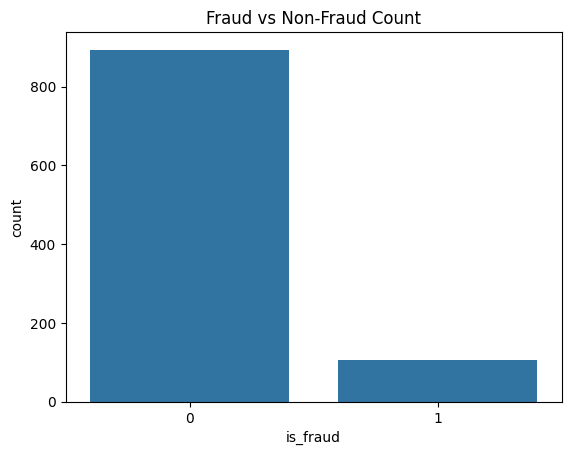


🎯 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00        29

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

✅ Accuracy: 1.0


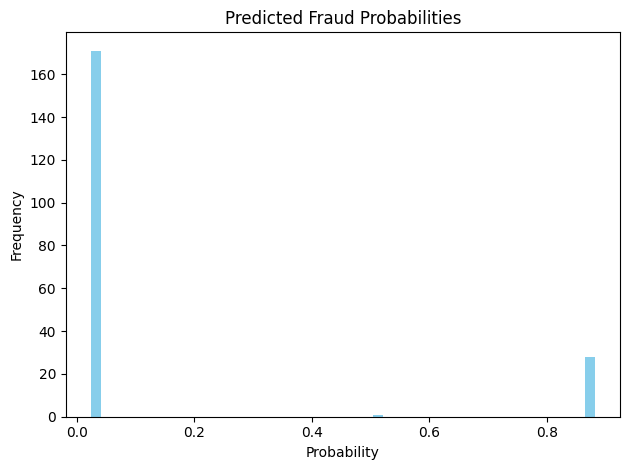

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Optional: use SQL with pandas
!pip install -q pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# 1. Create synthetic dataset
np.random.seed(42)
num_samples = 1000

df = pd.DataFrame({
    'transaction_id': range(1, num_samples + 1),
    'amount': np.random.uniform(10, 10000, num_samples),
    'hour': np.random.randint(0, 24, num_samples),
    'age': np.random.randint(18, 70, num_samples),
    'is_foreign': np.random.randint(0, 2, num_samples),
    'is_risky_country': np.random.randint(0, 2, num_samples)
})

# 2. Label fraud: based on simple logic
df['is_fraud'] = ((df['amount'] > 5000) & (df['is_foreign'] == 1) & (df['is_risky_country'] == 1)).astype(int)

# 3. SQL Query: see how many frauds
q = "SELECT is_fraud, COUNT(*) as total FROM df GROUP BY is_fraud"
print("\n🔍 Fraud distribution from SQL query:")
print(pysqldf(q))

# 4. Visualize fraud distribution
sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs Non-Fraud Count")
plt.show()

# 5. Feature selection
X = df[['amount', 'hour', 'age', 'is_foreign', 'is_risky_country']]
y = df['is_fraud']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train XGBoost model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'max_depth': 4,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

model = xgb.train(params, dtrain, num_boost_round=20)

# 8. Predict
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# 9. Evaluation
print("\n🎯 Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# 10. Probability distribution
plt.hist(y_pred_prob, bins=50, color='skyblue')
plt.title("Predicted Fraud Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# New Section

# New Section

# New Section